# **Data Science for Natural Sciences submission**

## **Subject**: Detecting schizophrenia from Electroencephalography (EEG) data using Deep Learning
#### **author**: Shoumik Mahbub Ridoy

![spikewaves](waves.png "Electrical brain activity recorded by multiple electrodes")

## **Introduction**

Schizophrenia is a chronic mental illness that affects about 1% of people across the globe. One possible explanation for some of the symptoms of schizophrenia is that one or more problems with the corollary discharge process in the nervous system makes it difficult for patients to differentiate between internally and externally generated stimuli. Therefore, studying this process and its relationship to symptoms in the illness might allow us to better understand abnormal brain processes in patients with this diagnosis. Research in this field uses EEG to observe neural activity.

EEG is a method to record an electrogram of the electrical activity on the scalp that has been shown to represent the macroscopic activity of the surface layer of the brain underneath. It is typically non-invasive, with the electrodes placed along the scalp. The electrodes measure voltage fluctuations resulting from ionic current within the neurons of the brain. 

In research about schizophrenia, currently EEG is often used in combination with machine learning. EEG data are pre-processed to be passed on to machine learning algorithms. These algorithms are can be trained to recognize different diseases like schizophrenia, epilepsy or dementia.

Several experiments on schizophrenia patients have been conducted to observe and analyze the electrical currents in their brains while receiving stimuli. 

## **Experiment**
In the presented experiment, the procedure was designed as following: 26 schizophrenia patients and 22 healthy participants were connected with 64 electrodes on their scalps and 2 external channels recording EEG data. 

![electrodes](electrodes.jpg "Electrode scalp sites")

The subjects were instructed to complete a simple button pressing task in which they either (1) pressed a button to immediately generate a tone, (2) passively listened to the same tone, or (3) pressed a button without generating a tone to study the corollary discharge in people with schizophrenia and comparison controls. Among the results, it was found that comparison controls suppressed the N100, an eletric potential in EEG brain wave 100 milliseconds after the onset of a sound, when they pressed a button to generate a tone compared to passive playback, but patients with schizophrenia did not. People with schizophrenia often misperceive sensations and misinterpret experiences, perhaps contributing to the psychotic symptoms that characterize the illness. These misperceptions and misinterpretations might result from a basic inability to make valid predictions about expected sensations and experiences. Healthy normal people take advantage of neural mechanisms that allow them to make predictions unconsciously, facilitating processing of sensations and distinguishing the expected from the unexpected. If predictive mechanisms are dysfunctional, sensations that should have been predicted but were not might take on inappropriate salience. The reduced N100-suppression effect for self-initiated sounds is suspected to be an indicator for a dysfunctional predictive mechanism within the schizophrenic patient group, especially those showing symptoms of hallucinations. 

![n1suppression](n1.png "N1 suppression for control group and patients")

## **Data**
The data set is a larger sample replication of that previous study. Specifically, EEG data from 22 controls and 36 patients with schizophrenia have been combined with 10 controls and 13 patients from the previous report, resulting in a dataset of 81 subjects (32 controls, 49 patients), each delivering timeseries data of 70 eletrode channels. The data can be acquired at Kaggle in the following competition:
<br>Part 1 - https://www.kaggle.com/broach/button-tone-sz<br>
Part 2 - https://www.kaggle.com/broach/buttontonesz2<br>

## **Approach**
Goal of this project is to generate an insight into the study of neurological disorders and the role of Deep Learning in this field. Recently, Convolutional Neural Networks (CNN) have found their way in research to automate diagnosis of mental disorders. As a demonstration, a CNN will be built and trained on the provided data in order to classify experimentees based on EEG data. A claim on targeted classification accuracy is out of scope for this project and will not be pursued. Instead, this approach focuses on the exploration and preparation steps required for processability.

In [1]:
import os
import time
import keras

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Checking paths

for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\columnLabels.csv
./input\demographic.csv
./input\ERPdata.csv
./input\mergedTrialData.csv
./input\time.csv


In [2]:
# Loading the demographic.csv data to glimpse over the data and look for class imbalances

demographic = pd.read_csv("./input/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [5]:
demographic[" group"].mean()

0.6049382716049383

Since 0 is the label for the healthy control group and 1 for schizophrenic patients, there tend to be more schizophrenic patients in the data. There is a light imbalance of classes in the provided data.

In [6]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i})   Schizophrenic")
    else:
        print(f"{i})   Control")

0)   Control
1)   Control
2)   Control
3)   Control
4)   Control
5)   Control
6)   Control
7)   Control
8)   Control
9)   Control
10)   Control
11)   Control
12)   Control
13)   Control
14)   Control
15)   Control
16)   Control
17)   Control
18)   Control
19)   Control
20)   Control
21)   Control
22)   Control
23)   Control
24)   Schizophrenic
25)   Schizophrenic
26)   Schizophrenic
27)   Schizophrenic
28)   Schizophrenic
29)   Schizophrenic
30)   Schizophrenic
31)   Schizophrenic
32)   Schizophrenic
33)   Schizophrenic
34)   Schizophrenic
35)   Schizophrenic
36)   Schizophrenic
37)   Schizophrenic
38)   Schizophrenic
39)   Schizophrenic
40)   Schizophrenic
41)   Schizophrenic
42)   Schizophrenic
43)   Schizophrenic
44)   Schizophrenic
45)   Schizophrenic
46)   Schizophrenic
47)   Schizophrenic
48)   Schizophrenic
49)   Schizophrenic
50)   Schizophrenic
51)   Schizophrenic
52)   Schizophrenic
53)   Schizophrenic
54)   Schizophrenic
55)   Schizophrenic
56)   Schizophrenic
57)   Schizoph

The experiment outline in the Introduction section states that the main founding of the experiment was a remarkable difference in the EEG data of healthy people and those affected by schizophrenia, when they pressed the button and an audio signal was played as opposed to when the tone was played without them having touched the button. To see the difference, two candidates, one healthy and one schizophrenic are selected and their brainwave data is visualized in a timeseries.

In [19]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [8]:
# Healthy subject number

diagnosis_dict[2]

0

In [9]:
# Schizophrenic subject number

diagnosis_dict[79]

1

The attached ERP dataset contains the averaged brainwave time series of 9 electrodes for all subjects. The electric activity was measured while they (1) pressed a button to generate a tone, (2) listened to tone being played without action, and (3) pressed the button without generating the tone. The experiment showed less amplitude in the neural activity of schizophrenic persons whenever the tone was played, so in scenarios (1) and (2), compared to non-schizophrenic ones.

In [3]:
erp = pd.read_csv("./input/ERPdata.csv")
erp.head()

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


In [ ]:
def plot_eeg(subject_number):
    
    if diagnosis_dict[subject_number] == 0:
        status = "Healthy"
    else:
        status = "Schizophrenic"
        
    plt.plot(erp[(erp.subject==subject_number) & (erp.condition==1)].time_ms, erp[(erp.subject==subject_number) & (erp.condition==1)].Fz)
    plt.ylim(-10, 12)
    plt.title("Tone signal after button press - " + status)  
    plt.xlabel("Time (ms) on tone signal")
    plt.ylabel("Electrode signal (µvolts)")
    plt.show()

    plt.plot(erp[(erp.subject==subject_number) & (erp.condition==2)].time_ms, erp[(erp.subject==subject_number) & (erp.condition==2)].Fz)
    plt.ylim(-10, 12) 
    plt.title("Tone signal without button press - " + status)  
    plt.xlabel("Time (ms) on tone signal")
    plt.ylabel("Electrode signal (µvolts)")
    plt.show()

    plt.plot(erp[(erp.subject==subject_number) & (erp.condition==3)].time_ms, erp[(erp.subject==subject_number) & (erp.condition==3)].Fz)
    plt.ylim(-10, 12)  
    plt.title("No tone signal after button press - " + status)    
    plt.xlabel("Time (ms) on button press") 
    plt.ylabel("Electrode signal (µvolts)")
    plt.show()

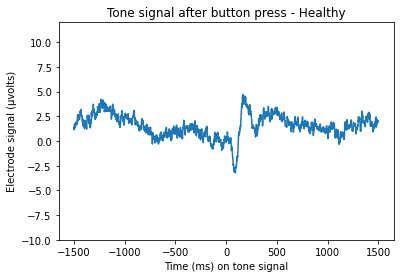

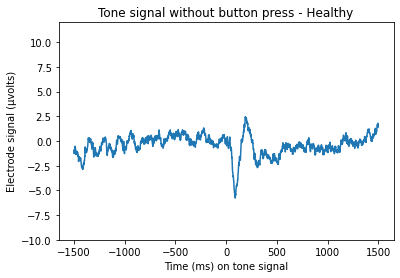

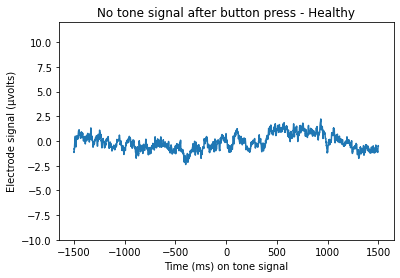

In [24]:
plot_eeg(2)

In [21]:
demographic[demographic.subject == 2]

,subject,group,gender,age,education
1,2,0,M,39,17.0


Upper plots show the electrode signal of a healthy, male individual of 39 years and normal education. An amplitude shortly after the signal tone can be seen.

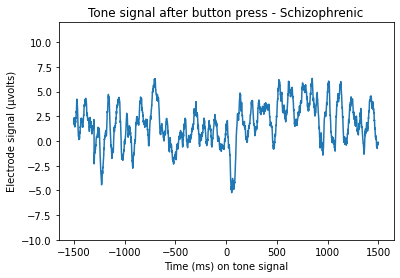

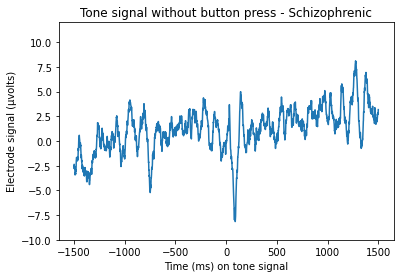

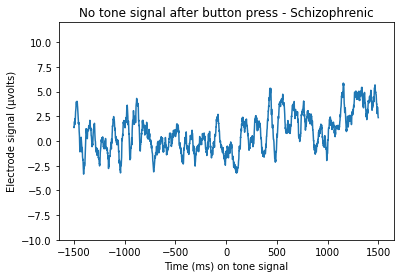

In [26]:
plot_eeg(79)

In [22]:
demographic[demographic.subject == 79]

,subject,group,gender,age,education
78,79,1,M,37,16.0


Upper plots show the electrode signal of a schizphrenia affected, male individual of 37 years and normal education. The amplitude shortly after the signal tone is not as clear and the brainwave in general is more erratic. 

In [4]:
electrodes_list = list(pd.read_csv("./input/columnLabels.csv").columns[4:])
print(electrodes_list)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


In [3]:
len(electrodes_list)

70

## **Downsampling**

There are 81 subjects to analyze. Each subject had to complete each of the 3 button/tone scenarios 100 times (100x button press with tone after, 100x tone signal without button being pushed, 100x button press with no tone signal after) and for each of the 300 trials, up to 3,072 samples of each electrode were collected. The data was collected for 70 electrodes, so this results in 81 datasets of each roughly 64.5 million values (3 * 100 * 3,072 * 70), if all samples were collected, which is not always the case. Still, this is too much data to process, so simplifying the data before training is inevitable. To downsize the data a little bit, the average of N samples of each electrode can be calculated.

In [9]:
# Function to calculate the average of N values of every electrode for each trial. This step reduces the dimension of the input data by factor N.

def averaged_by_N_rows(a, n):
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0] // n, n, shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec

In [ ]:
# The number that the number of maximum samples of 9,216 is divided by
N_AVERAGED = 16

# Empty matrices of 0s in the required dimensions are built:
# 81 = no. of subjects
# 100 = no. of trials (100 trials per subject)
# 9,216 = 3 button press/tone scenarios * 3,072 EEG samples
# electrodes_list = 70
X = np.zeros((81 * 100,  9216 * len(electrodes_list) // N_AVERAGED), dtype="float32")
Y = np.zeros(len(X))

part1_path = "./input/part1"
part2_path = "./input/part2"

x_counter = 0
column_list = pd.read_csv("./input/columnLabels.csv").columns
for person_number in range(1, 81 + 1):
            
    
    csv_path = f"{part1_path}/{person_number}.csv/{person_number}.csv"
    if not os.path.exists(csv_path):
        csv_path = f"{part2_path}/{person_number}.csv/{person_number}.csv"
    df = pd.read_csv(csv_path, 
                header=None,
                names=column_list
                )

    trials_list = set(df.trial)
    
# For every trial from 1 to 100 of each test subject from 1 to 81, up to 9,216 samples are divided by 16 (in some test subjects' trials there are less than 9,216 samples).
    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_AVERAGED)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1

print("Number of trials - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]

The averaged electrode data was saved as X variable and the corresponding diagnosis was saved to a Y variable. The contained data can be written to a binary format file (for fewer disk space usage).

In [ ]:
X.tofile("./working/goodX_every4.bin")
Y.astype("uint8").tofile("./working/goodY_every4.bin")

The X and Y binary files have to be converted to NumPy arrays, so that they can be used as an input for CNNs.

In [12]:
Y = np.fromfile("./working/goodY_every4.bin", dtype=np.uint8)    
X = np.fromfile("./working/goodX_every4.bin", dtype=np.float32).reshape(len(Y), -1)
print("Done! Time:", time.ctime())

Done! Time: Thu Jan  6 16:14:06 2022


In [2]:
Y = np.fromfile("./working/goodY_every4.bin", dtype=np.uint8)    
X = np.fromfile("./working/goodX_every4.bin", dtype=np.float32).reshape(len(Y), -1)
print("Done! Time:", time.ctime())

Done! Time: Sat Jan 15 21:02:10 2022


## **Preprocessing**

Before being used as an input, the electrode values are being normalized because it is recommended to use scaling on CNN input. To do so, the electrode values have to be represented in one dimension and everything else (test subject, trial no., sample no.) has to be put into the other dimension.

In [3]:
X_norm = (normalize(X.reshape(-1, 70), axis=0, norm='max')).reshape(X.shape)

## **Train/Test-Split**

In [4]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

The predictor data is once more reshaped so that the array has three dimensions:
1) each trial of every test subject (81 * 100)
2) electrodes (70)
3) average of every 16th of the 9,216 samples (576)

Not every trial had all the 9,216 samples, so it is expected that there are not all 81 * 100 trials present in the array.

In [14]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0], len(electrodes_list), X_train_norm.shape[1] // len(electrodes_list), 1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0], len(electrodes_list), X_test_norm.shape[1] // len(electrodes_list), 1)
X_train_2d.shape[0] + X_test_2d.shape[0]

7092

7,092 trials are in the array, so 7,092 "cases" which can be used for training and testing, each labelled as healthy or schizophrenic.

## **Modelling**

### 1st Model

In [17]:
filepath="./best_model1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 20),
                 activation='tanh',
                 input_shape=(X_train_2d.shape[1:])))
model.add(MaxPooling2D(pool_size=(5, 15)))

model.add(Conv2D(13, kernel_size=(3, 3),
                 activation='tanh',))
model.add(MaxPooling2D(pool_size=(3, 3)))
          

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(317, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(0.00001),
              metrics=['acc'])

In [23]:
history_params = []

In [24]:
history = model.fit(X_train_2d, Y_train_norm,
          batch_size=17,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm), callbacks=[checkpoint])

Epoch 1/100
334/334 [==============================] - ETA: 0s - loss: 0.6841 - acc: 0.5794
Epoch 00001: val_acc improved from -inf to 0.59267, saving model to .\best_model2.h5
334/334 [==============================] - 344s 1s/step - loss: 0.6841 - acc: 0.5794 - val_loss: 0.6744 - val_acc: 0.5927
Epoch 2/100
334/334 [==============================] - ETA: 0s - loss: 0.6690 - acc: 0.5983
Epoch 00002: val_acc did not improve from 0.59267
334/334 [==============================] - 233s 697ms/step - loss: 0.6690 - acc: 0.5983 - val_loss: 0.6705 - val_acc: 0.5927
Epoch 3/100
334/334 [==============================] - ETA: 0s - loss: 0.6669 - acc: 0.5983
Epoch 00003: val_acc did not improve from 0.59267
334/334 [==============================] - 137s 409ms/step - loss: 0.6669 - acc: 0.5983 - val_loss: 0.6701 - val_acc: 0.5927
Epoch 4/100
334/334 [==============================] - ETA: 0s - loss: 0.6658 - acc: 0.5983
Epoch 00004: val_acc did not improve from 0.59267
334/334 [================

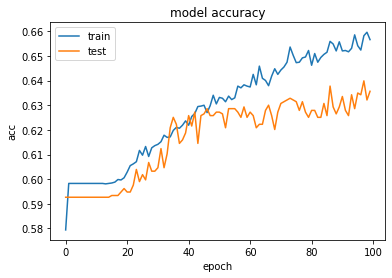

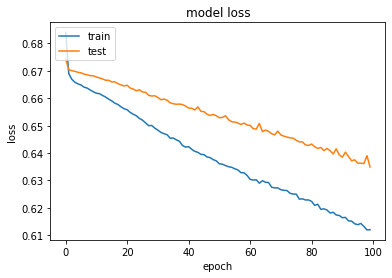

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model seems to underfit. Test accuracy increases well till the 40th epoch but then starts to stagger, whereas the accuracy on the training data continues to improve. The model loss decreases gradually both for training and test data, meaning that further training might minimize loss further.

In [26]:
accuracy, loss = model.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy}  val loss={loss}")

45/45 [==============================] - 4s 94ms/step - loss: 0.6349 - acc: 0.6357
Val accuracy=0.6349347233772278  val loss=0.6356589198112488


In [27]:
y_predicted =  model.predict(X_test_2d)

confusion_matr = confusion_matrix(Y_test_norm, np.round(model.predict(X_test_2d)))
confusion_matr

array([[212, 366],
       [151, 690]], dtype=int64)

In [28]:
print(
  "True negative control(0): ", confusion_matr[0, 0], "\n",
  "False negative control(0):", confusion_matr[0, 1], "\n",
  "False positive schizophrenic(1):", confusion_matr[1, 0], "\n",
  "True positive schizophrenic(1):", confusion_matr[1, 1], "\n"    
)

True positive schizophrenic(1):  212 
 False positive schizophrenic(1): 366 
 False positive control(0): 151 
 True positive control(0): 690 



In [29]:
TN = confusion_matr[0, 0]
FN = confusion_matr[0, 1]
FP = confusion_matr[1, 0]
TP = confusion_matr[1, 1]
TP, FP, FN, TN

(212, 366, 151, 690)

In [30]:
sensitivity = TP / (TP + FN)
sensitivity

0.5840220385674931

In [31]:
specificity = TN / (TN + FP)
specificity

0.6534090909090909

### **Model 1**

Accuracy: **63.5%%** <br>
Sensitivity: **58.4%** <br>
Specificity: **65.3%** <br>

The first model classifies 63,5% of the trials correctly. Sensitivity and specificity lie around 58,4% and 65,3%, meaning that the model is not very accurate yet and performs slightly better than guessing randomly. The reason for this is that the model could not learn the predicting patterns correctly and could not depict the complexity behind the differences in the brainwave data of schizophrenic and healthy subjects.

### 2nd Model

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [34]:
filepath="./best_model2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_2 = Sequential()
model_2.add(Dense(5000,
                  activation='relu',
                  input_shape=(X_train.shape[1:])))
 


model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss=keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['acc'])

In [35]:
history_params_2 = []
history_2 = model_2.fit(X_train, Y_train,
          batch_size=17,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test), callbacks=[checkpoint])

Epoch 1/100
334/334 [==============================] - ETA: 0s - loss: 161.5089 - acc: 0.5628
Epoch 00001: val_acc improved from -inf to 0.55673, saving model to ./working\best_model2.h5
334/334 [==============================] - 503s 2s/step - loss: 161.5089 - acc: 0.5628 - val_loss: 49.0847 - val_acc: 0.5567
Epoch 2/100
334/334 [==============================] - ETA: 0s - loss: 68.5085 - acc: 0.6138
Epoch 00002: val_acc improved from 0.55673 to 0.62156, saving model to ./working\best_model2.h5
334/334 [==============================] - 454s 1s/step - loss: 68.5085 - acc: 0.6138 - val_loss: 56.0582 - val_acc: 0.6216
Epoch 3/100
334/334 [==============================] - ETA: 0s - loss: 96.8944 - acc: 0.6568
Epoch 00003: val_acc did not improve from 0.62156
334/334 [==============================] - 477s 1s/step - loss: 96.8944 - acc: 0.6568 - val_loss: 90.3738 - val_acc: 0.6039
Epoch 4/100
334/334 [==============================] - ETA: 0s - loss: 135.6147 - acc: 0.6778
Epoch 00004: v

In [36]:
loss, accuracy = model_2.evaluate(X_test, Y_test)
loss, accuracy 

45/45 [==============================] - 9s 192ms/step - loss: 6656.5229 - acc: 0.6695


(6656.52294921875, 0.6694855690002441)

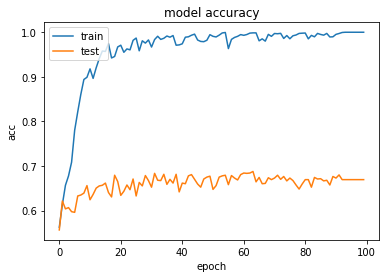

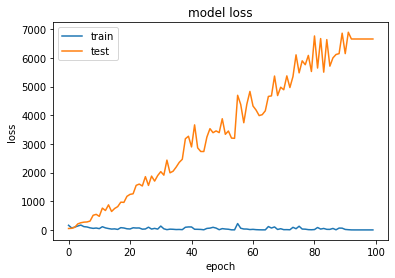

In [37]:
print(history_2.history.keys())

plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The second model overfits the training data. It predicts with almost perfect accuracy on training data but fails to generalize on the test data. Training loss is almost zero but test loss increases with every epoch, meaning that the learned patterns do not apply on newly seen data.

In [38]:
y_predicted =  model_2.predict(X_test)

confusion_matr = confusion_matrix(Y_test, np.round(model_2.predict(X_test)))
confusion_matr

array([[333, 245],
       [224, 617]], dtype=int64)

In [39]:
print(
  "True negative control(0): ", confusion_matr[0, 0], "\n",
  "False negative control(0):", confusion_matr[0, 1], "\n",
  "False positive schizophrenic(1):", confusion_matr[1, 0], "\n",
  "True positive schizophrenic(1):", confusion_matr[1, 1], "\n"    
)

True positive schizophrenic(1):  333 
 False positive schizophrenic(1): 245 
 False positive control(0): 224 
 True positive control(0): 617 



In [40]:
TN = confusion_matr[0, 0]
FN = confusion_matr[0, 1]
FP = confusion_matr[1, 0]
TP = confusion_matr[1, 1]
TP, FP, FN, TN

(333, 245, 224, 617)

In [41]:
sensitivity = TP / (TP + FN)
sensitivity

0.5978456014362658

In [42]:
specificity = TN / (TN + FP)
specificity

0.7157772621809745

### **Model 2**

Accuracy: **66.9%** <br>
Sensitivity: **59.8%** <br>
Specificity: **71.6%** <br>

Despite of the strong overfitting, the accuracy, sensitivity and specificity metrics could improve in comparison to the first model. This time, the performance was restrained by learning patterns in the brainwaves of schizophrenic patients too well, ending up failing to recognize the disease in wave data if it slightly differs.

### 3rd Model

For this model, the ERP dataset is used. It contains the time series of 9 electrodes. The data is supplemented with demographic data to serve as additional features. Before splitting, the time series of the 3rd scenario is removed, because the distinction of healthy and schizophrenic subjects was based on the 1st and 2nd button/tone scenario. This filtering leaves 497,644 observations in the dataset.

In [5]:
data = pd.merge(erp, demographic, how='left', left_on='subject', right_on='subject')
data = data[data.condition != 3]
data = data.drop(['subject', 'condition', 'time_ms'], axis=1)
data.loc[data[" gender"] == " M", " gender"] = 0
data.loc[data[" gender"] == " F", " gender"] = 1

In [6]:
Y = data[" group"]
X = data.drop([" group"], axis = 1)

In [7]:
X_norm = normalize(X)

In [8]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

In [9]:
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 4, 3, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 4, 3, 1)

In [10]:
model = Sequential()
model.add(Conv2D(input_shape=X_train_norm.shape[1:],filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(1,1),strides=(1,1)))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00005), 
              loss=keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [27]:
history_params = []

filepath="./best_model3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_freq="epoch")

In [28]:
history = model.fit(X_train_norm, Y_train_norm,
          batch_size=500,
          epochs=50,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_norm, Y_test_norm), callbacks=[checkpoint])

Epoch 1/50
796/797 [============================>.] - ETA: 0s - loss: 0.1960 - accuracy: 0.9189
Epoch 00001: val_accuracy improved from -inf to 0.91790, saving model to .\best_model3.h5
797/797 [==============================] - 21s 24ms/step - loss: 0.1960 - accuracy: 0.9189 - val_loss: 0.1958 - val_accuracy: 0.9179
Epoch 2/50
796/797 [============================>.] - ETA: 0s - loss: 0.1954 - accuracy: 0.9193
Epoch 00002: val_accuracy improved from 0.91790 to 0.91829, saving model to .\best_model3.h5
797/797 [==============================] - 19s 23ms/step - loss: 0.1954 - accuracy: 0.9193 - val_loss: 0.1955 - val_accuracy: 0.9183
Epoch 3/50
796/797 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9190
Epoch 00003: val_accuracy did not improve from 0.91829
797/797 [==============================] - 18s 22ms/step - loss: 0.1954 - accuracy: 0.9190 - val_loss: 0.2010 - val_accuracy: 0.9153
Epoch 4/50
795/797 [============================>.] - ETA: 0s - loss: 0.194

In [14]:
loss, accuracy = model.evaluate(X_test_norm, Y_test_norm)
loss, accuracy 

3111/3111 [==============================] - 11s 4ms/step - loss: 0.3081 - accuracy: 0.8663


(0.3081071674823761, 0.866295576095581)

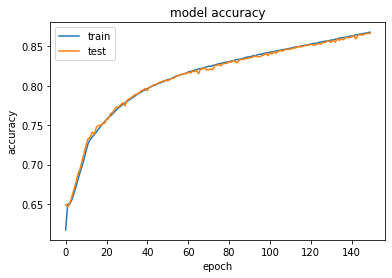

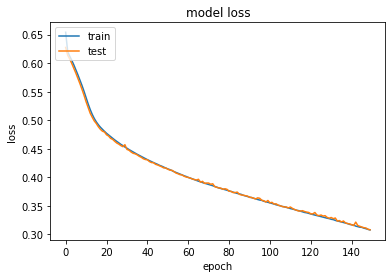

In [15]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This time, training achieved significant higher accuracy and fewer loss. Both metrics gradually rise/lower. Adding demographic data and removing the abundant 3rd scenario data helped the model to distinct the two groups. Both curves look smooth and are largely overlapping, so the learning rate was good. It looks like accuracy and loss did not reach their maximum/minimum so continuing training from this checkpoint or training with more epochs would likely still improve performance. Two more training runs with 100/50 epochs and a higher learning rate is started.

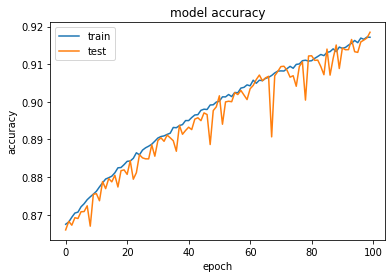

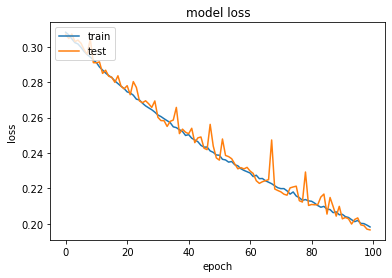

In [25]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

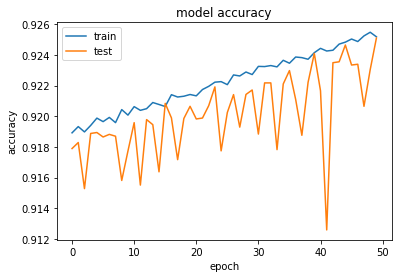

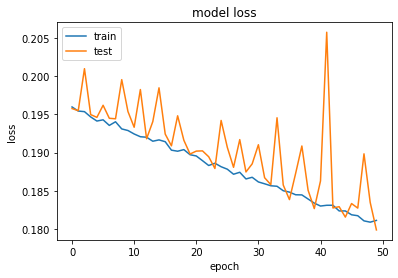

In [29]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

For the last training run, the learning rate seems to be too big, the local minimum is searched but overlooked, resulting in the validation accuracy to lag behind and oscillate.

In [30]:
y_predicted =  model.predict(X_test_norm)

confusion_matr = confusion_matrix(Y_test_norm, np.round(model.predict(X_test_norm)))
confusion_matr

array([[34950,  4324],
       [ 3131, 57128]], dtype=int64)

In [31]:
print(
  "True negative control(0): ", confusion_matr[0, 0], "\n",
  "False negative control(0):", confusion_matr[0, 1], "\n",
  "False positive schizophrenic(1):", confusion_matr[1, 0], "\n",
  "True positive schizophrenic(1):", confusion_matr[1, 1], "\n"    
)

True negative control(0):  34950 
 False negative control(0): 4324 
 False positive schizophrenic(1): 3131 
 True positive schizophrenic(1): 57128 



In [32]:
TN = confusion_matr[0, 0]
FN = confusion_matr[0, 1]
FP = confusion_matr[1, 0]
TP = confusion_matr[1, 1]
TP, FP, FN, TN

(57128, 3131, 4324, 34950)

In [33]:
sensitivity = TP / (TP + FN)
sensitivity

0.9296361387749789

In [34]:
specificity = TN / (TN + FP)
specificity

0.9177805204695255

### **Model 3**

Accuracy: **92.5%** <br>
Sensitivity: **92.9%** <br>
Specificity: **91.7%** <br>

The 3rd model with the combined ERP and demographic dataset achieved an accuracy of 92.5% in 3 training runs, 150 epochs/0.00005 learning rate, 100 epochs/0.0001 learning rate, 50 epochs/0.00005

## **Summary**

This work dealt with the use of Deep Learning methods in the detection of mental diseases. Main goal was to provide insight into the methods of measuring the characteristics of a disorder like schizophrenia and how to make the collected data processable for Artificial Neural Networks. One of the main challenge was merely the size of the data - when it comes to measuring complex neural processes, a lot of data needs to be collected. If not for downsizing the data, ~5 billion values could have been used for training. The calculation of the mean of every 16 electrode values reduced the data to ~300 million values. <br>

In hindsight, the data could have been reduced even more. As stated in the experiment results of Ford et al. (2013) the 3rd scenario (button press and no tone playing) did not show significant differences in the EEG data between the control group and patients. Leaving this scenario out could have reduced the input data to ~200 million values. Supposedly, this would have increased the overall performance because one scenario with no meaningfulness for the detection of schizophrenia were left out. <br>

| Model | 2Conv-2Pool | 1Dense | 2Conv-2Pool ERP+Demographic data |
|---|---|---|---|
| Accuracy | 63.5% | 66.9% | 92.5% |
| Sensitivity | 58.4% | 59.8% | 92.9% |
| Specificity | 65.3% | 71.6% | 91.7% |

Out of the three trained CNNs, the third one with two convolutional and two pooling layers outperformed the other two models and classified 92.5% of 99,533 trials correctly. The overall performance of the first two models was limited due to underfitting, respectively overfitting. Based on their simplicity, no new benchmarks in the performance of schizophrenia detection was expected. The third model had the advantage of using a more useful dataset with additional features and therefore achieved a higher accuracy. Top performing approaches include further preprocessing like wavelet transformation and hybrid model architecture of CNNs and Recurrent Neural Networks (Sun et al., 2021).

## **Sources**

Ford, J. M., Palzes, V. A., Roach, B. J., & Mathalon, D. H. (2014). Did I do that? Abnormal predictive processes in schizophrenia when button pressing to deliver a tone. Schizophrenia bulletin, 40(4), 804–812. https://doi.org/10.1093/schbul/sbt072<br>
Sun, J., Cao, R., Zhou, M. et al. A hybrid deep neural network for classification of schizophrenia using EEG Data. Sci Rep 11, 4706 (2021). https://doi.org/10.1038/s41598-021-83350-6<br>
https://www.kaggle.com/broach/button-tone-sz<br>
https://www.kaggle.com/broach/buttontonesz2<br>